# Лабораторна робота №5

## Робота з бібліотекою OpenCV

In [5]:
N = ord("Y") % 5 + 1
N

5

In [6]:
import os
import pandas as pd

In [7]:
table = pd.read_excel('lab6.xlsx')
table = table.set_index('N')
table

,file name,image size,glasses color,line width
N,,,,
1,emma-watson2.jpg,300x300,red,2
2,emma-watson.jpg,400x400,blue,3
3,draco.jpg,700x700,cian,4
4,longbottom.jpg,600x600,magenta,5
5,ron_wesley.jpg,500x500,yellow,6


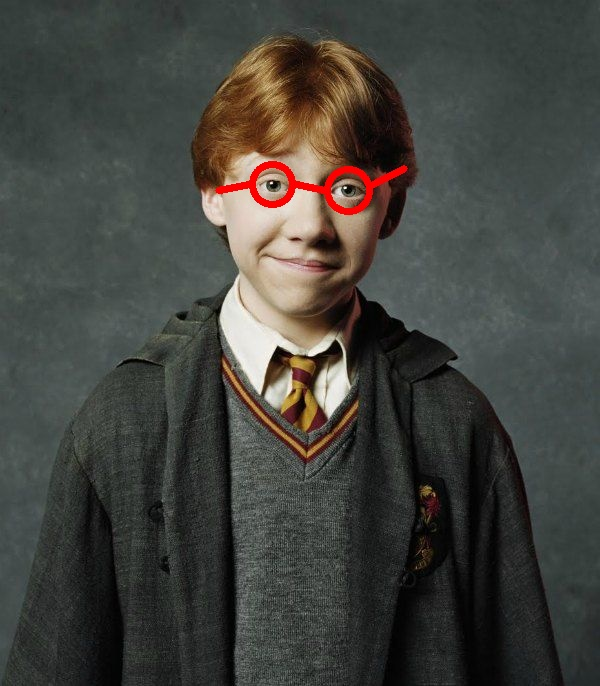

In [12]:
import cv2
from PIL import Image, ImageDraw

def get_bgr(color_name): 
    colors = { 
        'red': (0, 0, 255),
        'blue': (255, 0, 0), 
        'cian': (255, 255, 0),
        'magenta': (255, 0, 255), 
        'yellow': (0, 255, 255) 
    } 
 
    return colors.get(color_name.lower(), None)

def add_glasses(input, output_name):
    load_path = os.path.join("images", input["file name"])
    image = cv2.imread(load_path)
    color = (0, 0, 255)
    thickness = 6
    
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)

    for (x, y, w, h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray, 1.3, 4)

        if len(eyes) >= 2:
            if eyes[0][0] > eyes[1][0]:
                eyes[0], eyes[1] = eyes[1].copy(), eyes[0].copy()

        for (ex, ey, ew, eh) in eyes:
            center = (int(x + ex + ew / 2), int(y + ey + eh / 2))
            radius = int(ew / 2.3)  # Розмір окулярів

            cv2.circle(image, center, radius, color, thickness)

            ear_length = int(radius * 1.5)

            bridge_start = (int(x + eyes[0][0] +  eyes[0][2]), int(y + eyes[0][1] + eyes[0][3] / 2))
            bridge_end = (int(x + eyes[1][0]), int(y + eyes[1][1] + eyes[1][3] / 2))
            
            cv2.line(image, bridge_start, bridge_end, color, thickness)
    
            ear1_start = (int(x +eyes[0][0]), int(y + eyes[0][1] + eyes[0][3] / 2))
            ear1_end = (int(ear1_start[0] - ear_length), int(y + eyes[1][1] + eyes[1][3] / 2))
            
            cv2.line(image, ear1_start, ear1_end, color, thickness)
            
            ear2_start = (int(x + eyes[1][0] + eyes[1][2]), int(y + eyes[0][1] + eyes[0][3] / 2))
            ear2_end = (int(ear2_start[0] + ear_length), int(ear2_start[1] - ear_length / 2))
            
            cv2.line(image, ear2_start, ear2_end, color, thickness)

    save_path = os.path.join("withglasses", output_name)
    
    counter = 1
    while os.path.exists(save_path):
        output_name_without_extension, file_extension = os.path.splitext(output_name)
        new_name = f"{output_name_without_extension} ({counter}){file_extension}"
        save_path = os.path.join("withglasses", new_name)
        counter += 1

    cv2.imwrite(save_path, image)
    return new_name

N = 5
input_image = table.loc[N]
output_image = "result.jpg"

result = add_glasses(input_image, output_image)

new_image = Image.open(os.path.join("withglasses", result))

display(new_image)